# Geely Auto Case Study

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checkpoint1: Reading and Understanding the Data 

In [2]:
#Importing dataset
CarPrice=pd.read_csv('CarPrice_Assignment.csv',encoding = "ISO-8859-1")

In [3]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
CarPrice.keys()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
CarPrice.shape

(205, 26)

In [6]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

There is no missing value in the data.

#### Creating derived column CarCompany from CarName

In [7]:
CarPrice['CarCompany']=CarPrice['CarName'].apply(lambda x : x.split(' ')[0].lower())
#dropping CarName column
CarPrice=CarPrice.drop(columns=['CarName'])

In [8]:
CarPrice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checkpoint2: Visualizing the data

In [10]:
#Finding all numerical and categorical variables
numerical_feats = CarPrice.dtypes[CarPrice.dtypes != "object"].index
#print all numerical variables
print(numerical_feats)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


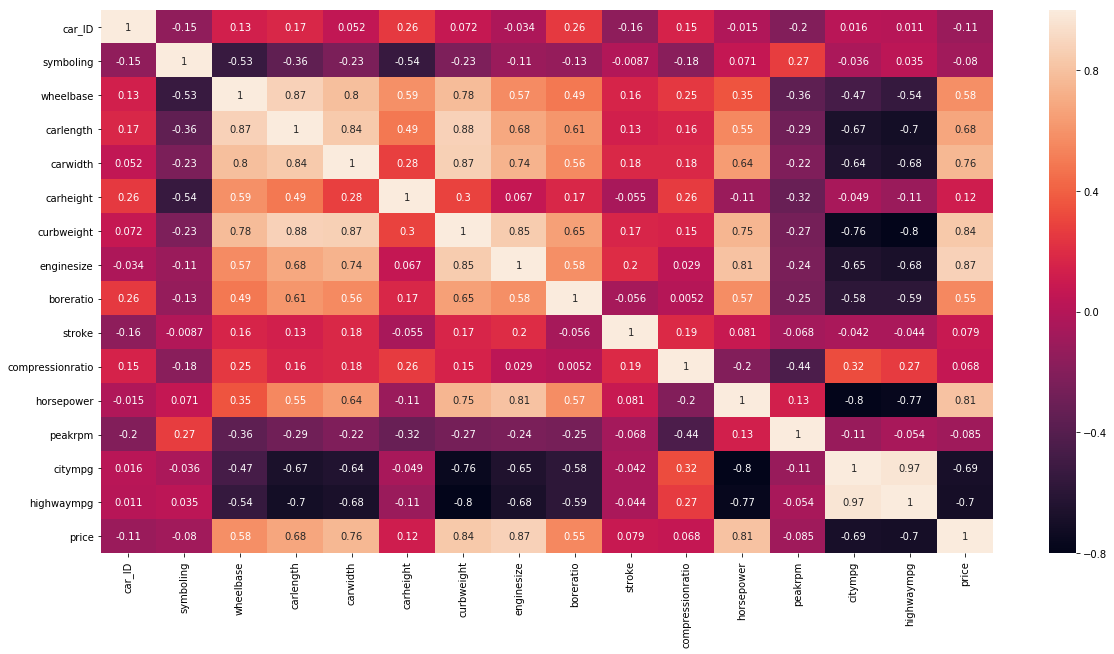

In [11]:
#since there are too many numerical features, first lets some idea from correlation plot
plt.figure(figsize = (20,10))
sns.heatmap(CarPrice[numerical_feats].corr(),annot=True)

Clearly car_ID, symboling, carheight, peakrpm have very low correlation with price of the car

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


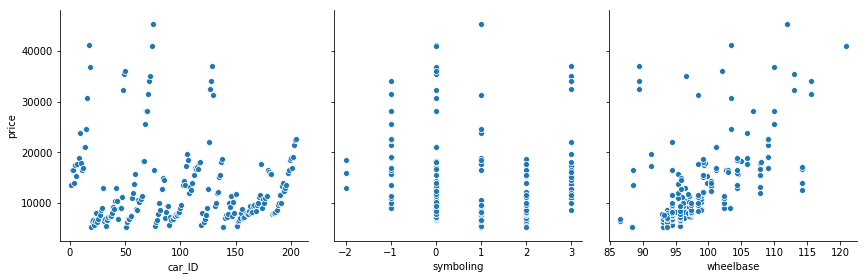

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


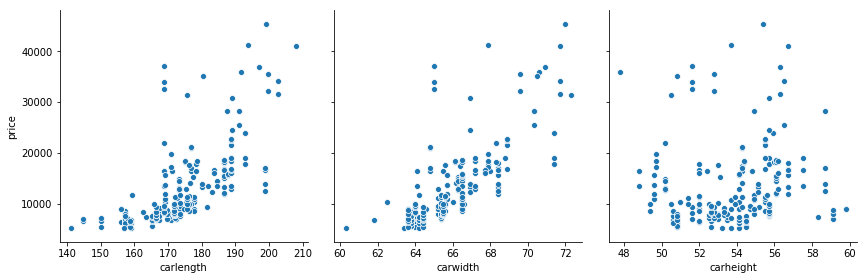

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


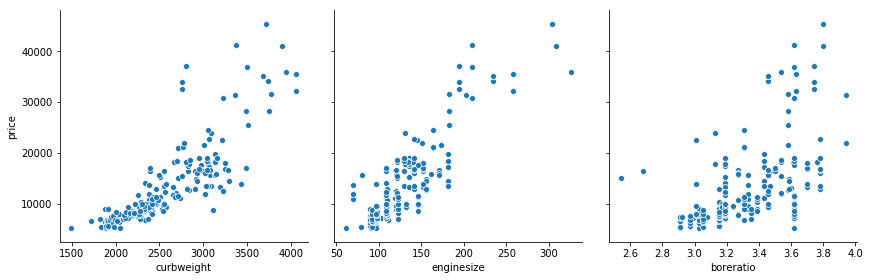

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


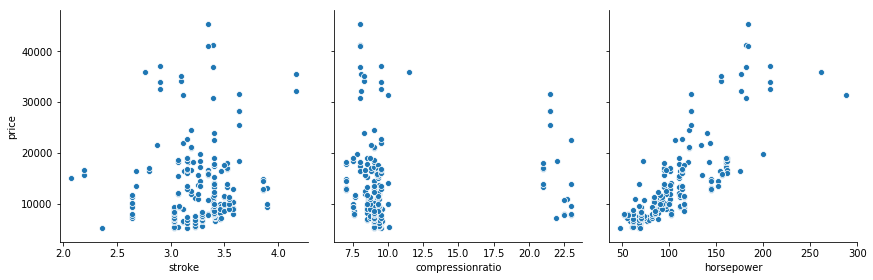

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


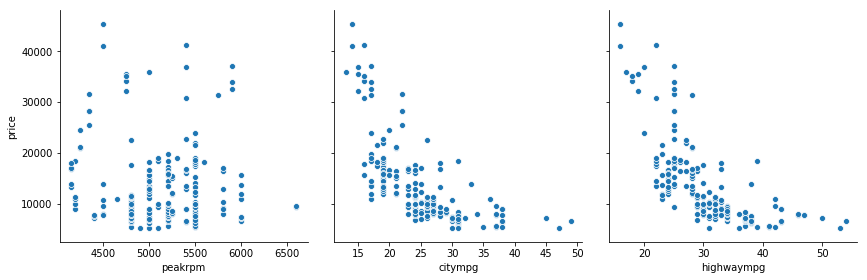

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


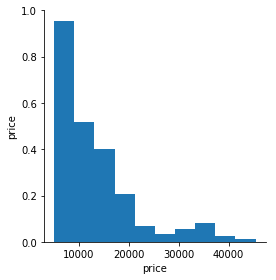

In [12]:
#Lets plot a pairplot of all the numerical variables, it can help to indentify possible predictors

V_len=len(numerical_feats)
offset=0
count=3
while offset < V_len:
    end=offset+count
    if end > V_len:
        end=V_len
    sns.pairplot(CarPrice, x_vars=numerical_feats[offset:end], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()
    offset=end



Significant Numerical Features are wheelbase,carwidth,carlength, curbweight, enginesize, boreratio, stroke, horsepower, citympg, highwaympg

In [13]:
#All Categical Variable
categorical_feats = CarPrice.dtypes[CarPrice.dtypes == "object"].index
print(categorical_feats)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CarCompany'],
      dtype='object')


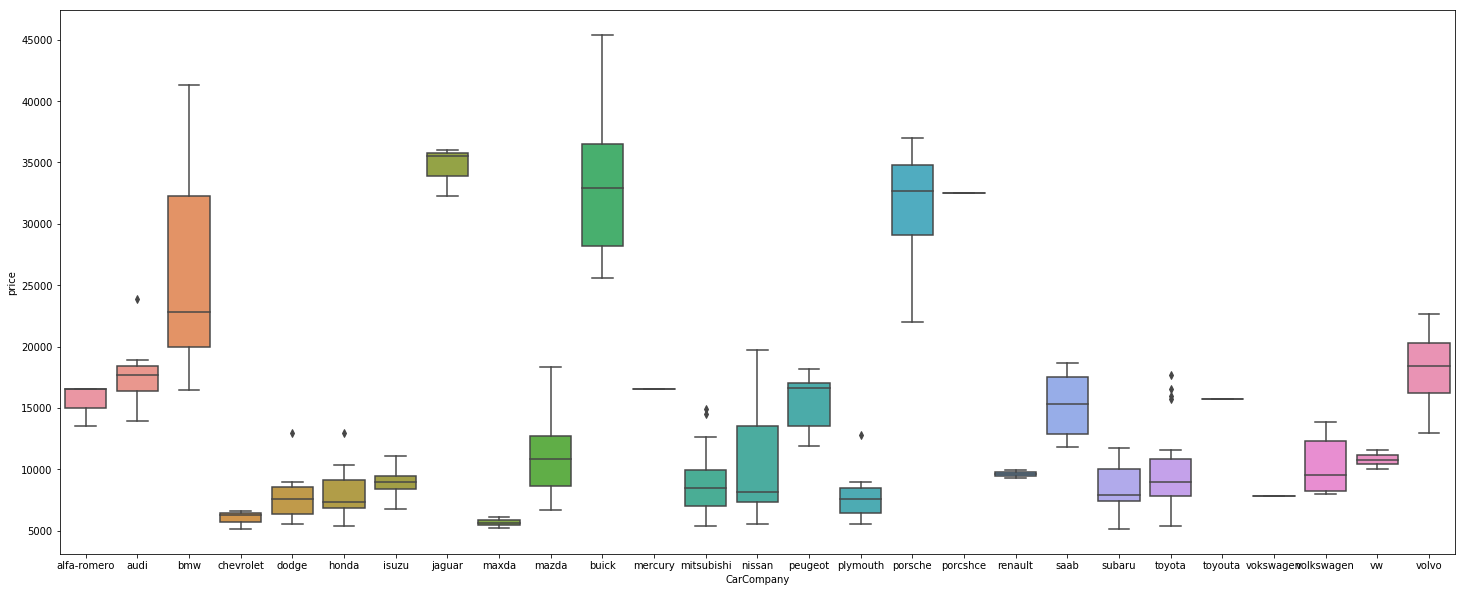

In [14]:
plt.figure(figsize=(25,10))

sns.boxplot(x='CarCompany', y='price', data=CarPrice)
plt.show()


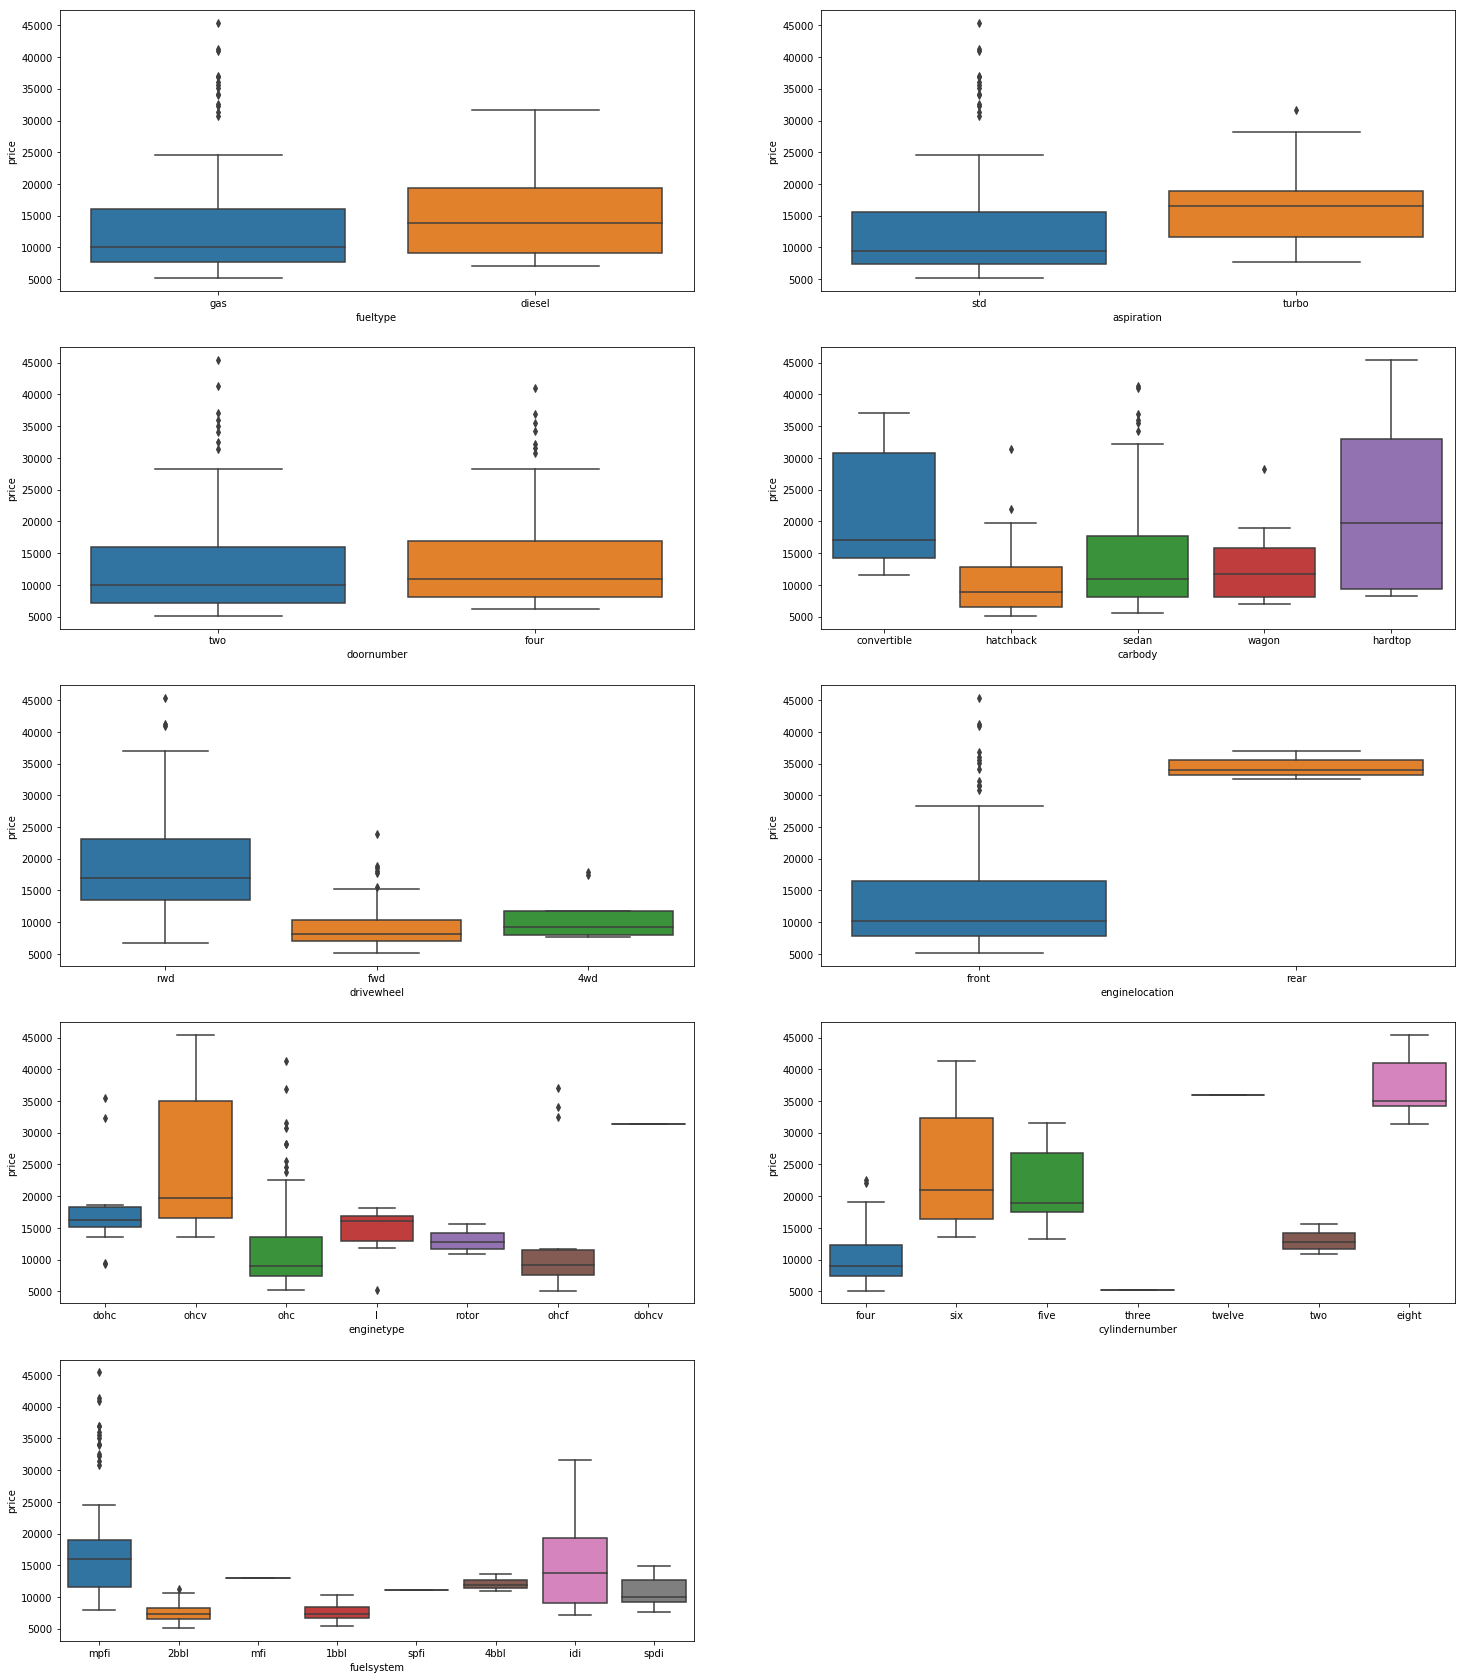

In [15]:
Other_categorical_vars=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

F_count=len(Other_categorical_vars)

cols=2
rows= int(F_count / cols) if  F_count % cols == 0 else int(F_count / cols) + 1

plt.figure(figsize=(25,30))
cnt=1
for feats in Other_categorical_vars:
    plt.subplot(rows,cols,cnt)
    sns.boxplot(x=feats, y='price', data=CarPrice)
    cnt+=1


plt.show()

The box plot shows doornumber is insignificant for price of the car

## Checkpoint3: Data Preparation

In [16]:
#Creating derived column Avgmpg using citympg and highwaympg
CarPrice['avgmpg'] = ((CarPrice['citympg'] + CarPrice['highwaympg'])/2)

In [17]:
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,avgmpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


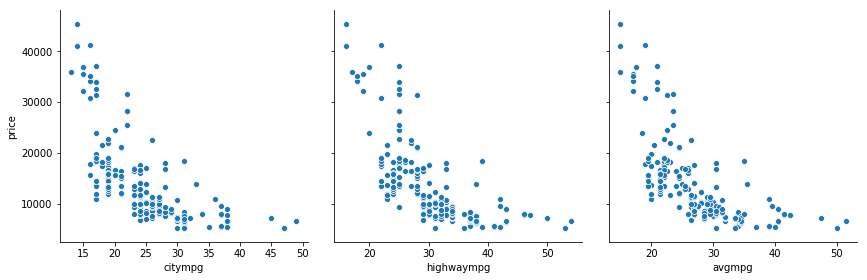

In [18]:
sns.pairplot(CarPrice, x_vars=['citympg','highwaympg','avgmpg'], y_vars='price',size=4, aspect=1, kind='scatter')

In [19]:
#Dropping citympg and highwaympg
CarPrice=CarPrice.drop(columns=['citympg','highwaympg'])

In [20]:
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CarCompany,avgmpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


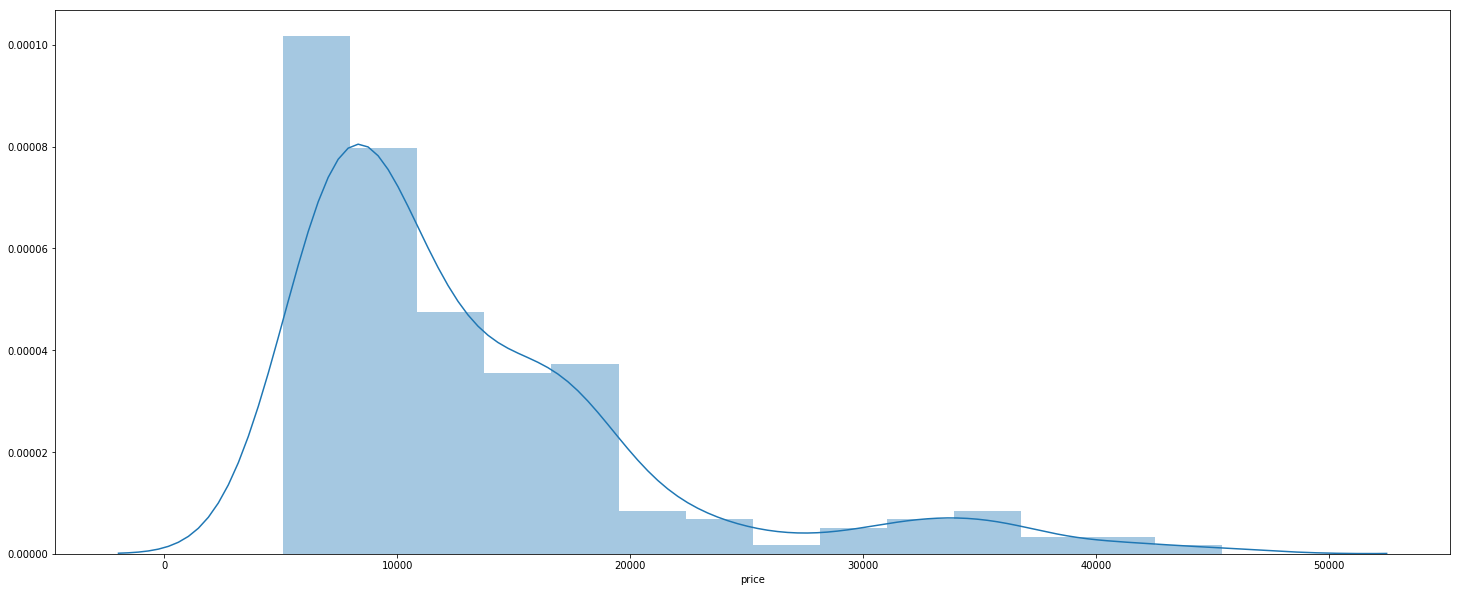

In [21]:
#Distribution of car prices

plt.figure(figsize=(25,10))

sns.distplot(CarPrice['price'])
plt.show()

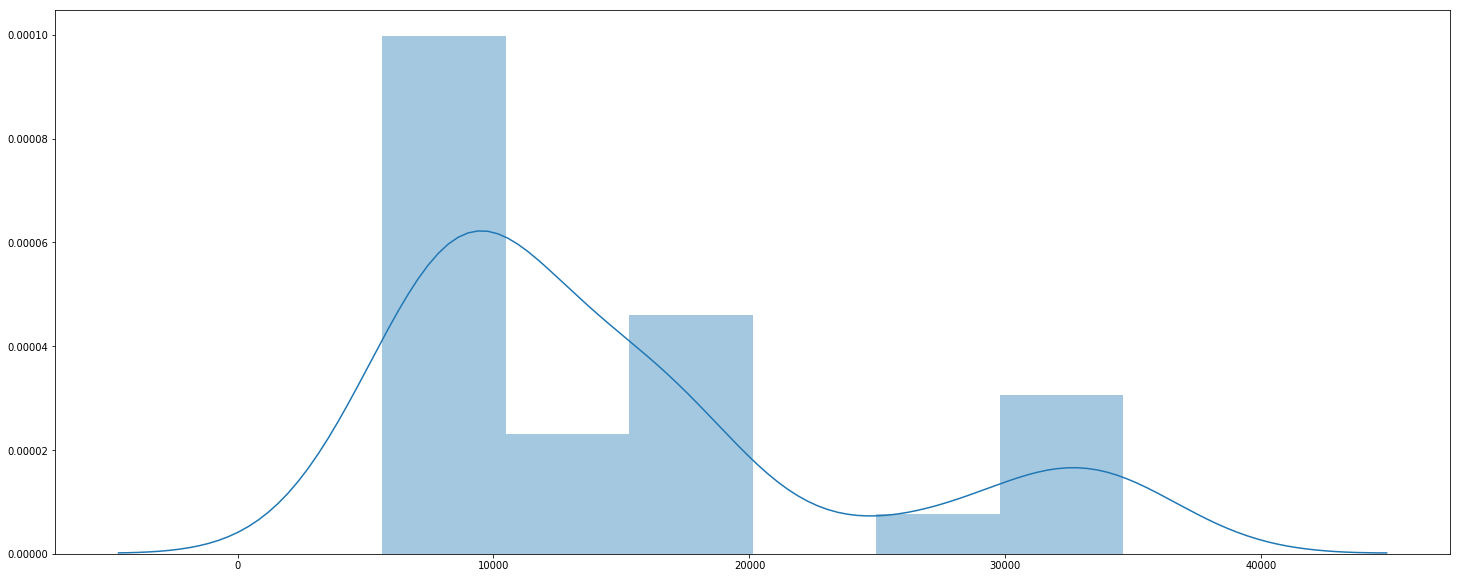

In [22]:
plt.figure(figsize=(25,10))
sns.distplot(CarPrice.groupby('CarCompany').agg({'price':['mean']}))
plt.show()

In [23]:
#Creating a derived categorical column car_price_range based on average car price of different car company
CarPrice_copy=CarPrice
Car_mean_price=CarPrice.groupby('CarCompany').agg({'price':['mean']})
CarPrice_copy = CarPrice_copy.merge(Car_mean_price, how='left',on='CarCompany')
CarPrice_copy=CarPrice_copy.rename(columns={('price', 'mean'):'avgprice'})


def price_range(x):
    if x <= 10000:
        return 'low'
    elif x >10000 and x<=20000:
        return 'budget'
    elif x>20000:
        return 'high'

CarPrice_copy['car_price_range']=CarPrice_copy['avgprice'].apply(lambda x : price_range(x))

CarPrice_copy=CarPrice_copy[['CarCompany','car_price_range']]


CarPrice=CarPrice.merge(CarPrice_copy, how='left',on='CarCompany')

CarPrice_copy=None

CarPrice.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CarCompany,avgmpg,car_price_range
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
1,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
2,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
3,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,budget
4,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,budget


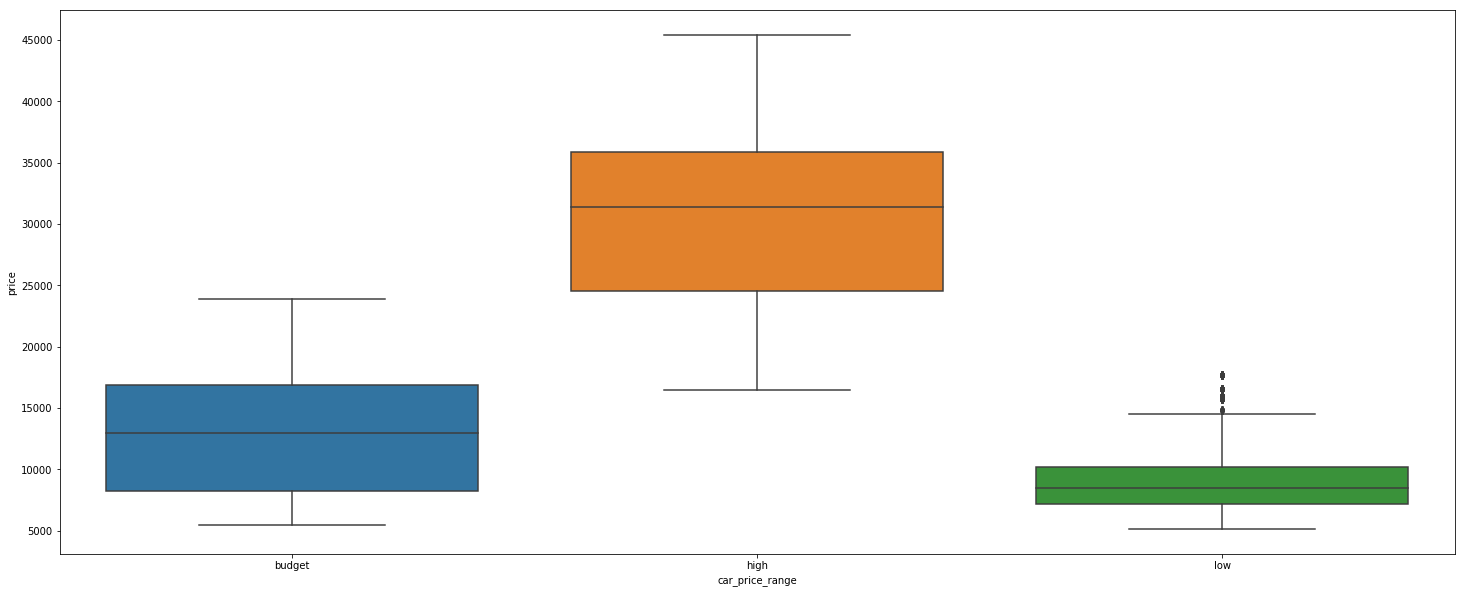

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(x='car_price_range', y='price', data=CarPrice)
plt.show()

#### Variables mapping

In [25]:
def binary_map(x):
    X_vals=x.unique()
    X_map_vals={ X_vals[0] :1 ,X_vals[1]:0}
    return x.map(X_map_vals)
 
varlist=['fueltype','aspiration','enginelocation']
CarPrice[varlist]=CarPrice[varlist].apply(binary_map)
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CarCompany,avgmpg,car_price_range
0,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
1,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
2,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0,budget
3,2,3,1,1,two,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,budget
4,2,3,1,1,two,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0,budget


#### Creating Dummy Variables

In [26]:
Variates=['carbody','drivewheel','enginetype','cylindernumber','car_price_range']

status=pd.get_dummies(CarPrice[Variates],drop_first = True)

CarPrice = pd.concat([CarPrice, status], axis = 1)

CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
0,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,3,1,1,two,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
3,2,3,1,1,two,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
4,2,3,1,1,two,convertible,rwd,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0


In [27]:
CarPrice.drop(Variates, axis = 1, inplace = True)
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
0,1,3,1,1,two,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
1,1,3,1,1,two,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
2,1,3,1,1,two,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
3,2,3,1,1,two,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
4,2,3,1,1,two,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0


In [28]:
#Dropping Unnecessery columns
CarPrice.dtypes[CarPrice.dtypes == "object"].index
CarPrice.drop(['doornumber', 'CarCompany', 'car_ID', 'symboling','fuelsystem'], axis = 1, inplace = True)
CarPrice.head()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
0,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,1,0,0,0,0,0,0


## Checkpoint4: Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
df_train.keys()

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price',
       'avgmpg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'car_price_range_high', 'car_price_range_low'],
      dtype='object')

In [32]:
#Scale all the numeric variables
numeric_vars=['wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price','avgmpg']


df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])

df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
2211,1,1,1,0.344023,0.523881,0.441667,0.350000,0.461986,0.320755,0.771429,...,0,0,0,1,0,0,0,0,0,1
499,1,1,1,0.253644,0.416418,0.450000,0.150000,0.347944,0.033962,0.564286,...,0,1,0,0,0,0,0,1,0,0
401,1,1,1,0.769679,0.873134,0.775000,0.416667,1.000000,0.743396,0.778571,...,0,0,0,0,1,0,0,0,1,0
1026,1,1,1,0.230321,0.434328,0.291667,0.475000,0.212956,0.135849,0.435714,...,0,0,0,1,0,0,0,0,0,0
2047,1,1,1,0.230321,0.411940,0.308333,0.400000,0.301396,0.139623,0.500000,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df_train.describe()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,...,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,0.897543,0.856769,0.996864,0.343229,0.475591,0.442712,0.492250,0.389516,0.229114,0.551452,...,0.059592,0.024046,0.028751,0.822269,0.109252,0.001045,0.000523,0.024046,0.054365,0.593309
std,0.303327,0.350399,0.055931,0.149982,0.159550,0.151555,0.193548,0.177376,0.129766,0.171616,...,0.236792,0.153232,0.167149,0.382386,0.312037,0.032325,0.022863,0.153232,0.226796,0.491345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.253644,0.376119,0.308333,0.350000,0.248254,0.135849,0.435714,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.288630,0.467164,0.425000,0.491667,0.347944,0.184906,0.521429,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.402332,0.547761,0.516667,0.608333,0.518231,0.301887,0.714286,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


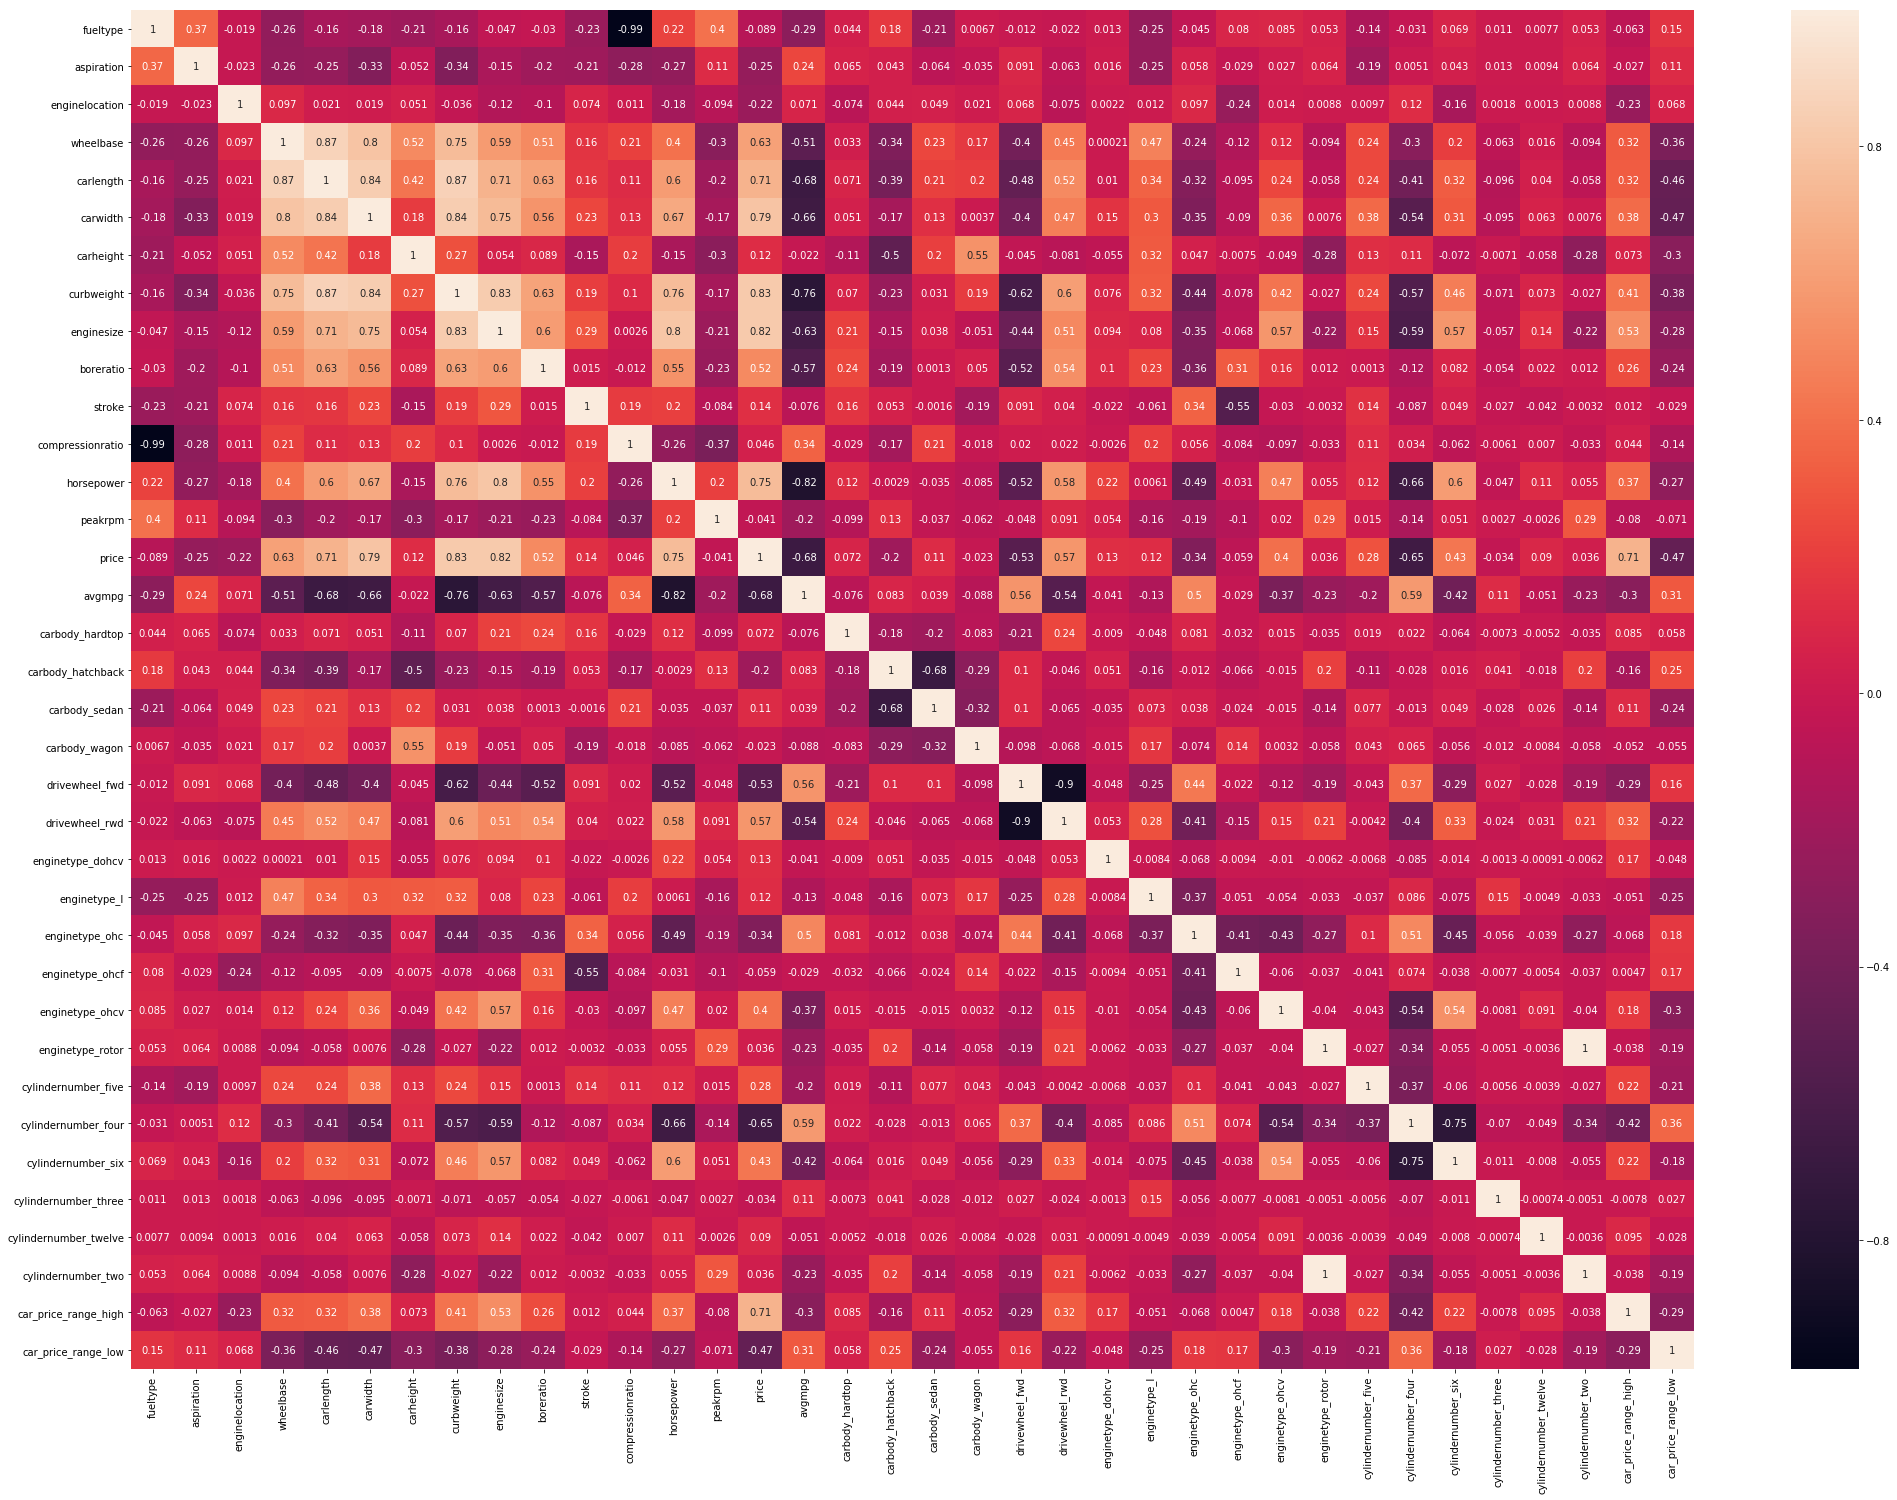

In [34]:
#Check the correlation coefficient to identify which variables are highly correlated

plt.figure(figsize=(35,25))

sns.heatmap(df_train.corr(),annot=True)

plt.show()

Highly Correlated variables with price are: wheelbase, carlength, carwidth, carweight, curbweight, enginesize, horsepower, avgmpg, cylindernumber_four, car_price_range_high

In [35]:
#Deviding data into X,Y Variables
Y_train=df_train.pop('price')
X_train=df_train

## Checkpoint5: Building a Linear Model

### RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
Var_mod1=LinearRegression()
Var_mod1.fit(X_train,Y_train)
var_rfe=RFE(Var_mod1,10)
var_rfe=var_rfe.fit(X_train,Y_train)

In [38]:
list(zip(X_train.columns,var_rfe.support_,var_rfe.ranking_))

[('fueltype', False, 13),
 ('aspiration', False, 24),
 ('enginelocation', True, 1),
 ('wheelbase', False, 9),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', True, 1),
 ('enginesize', False, 4),
 ('boreratio', False, 7),
 ('stroke', False, 8),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', False, 17),
 ('avgmpg', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 12),
 ('enginetype_ohc', False, 18),
 ('enginetype_ohcf', False, 23),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', False, 20),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 11),
 ('cylindernumber_twelve', False, 2),
 ('cylindernumber_two', False, 21),
 (

In [39]:
RFE_variates=X_train.columns[var_rfe.support_]
print(RFE_variates)

Index(['enginelocation', 'carwidth', 'curbweight', 'horsepower',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'car_price_range_high'],
      dtype='object')


In [40]:
X_train_RFE=X_train[RFE_variates]
X_train_RFE.head()

,enginelocation,carwidth,curbweight,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,car_price_range_high
2211,1,0.441667,0.461986,0.283333,1,0,0,0,0,0
499,1,0.450000,0.347944,0.220833,0,1,0,0,0,0
401,1,0.775000,1.000000,0.533333,0,0,1,0,0,1
1026,1,0.291667,0.212956,0.087500,0,0,0,1,0,0
2047,1,0.308333,0.301396,0.266667,0,0,1,0,0,0


#### Build a linear model

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#Defining generic function for building model
def build_linear_model(X,Y):
    X = sm.add_constant(X)
    lr = sm.OLS(Y, X).fit()
    print(lr.summary())
    return X


def Calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [43]:
X_train_1=build_linear_model(X_train_RFE,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1902.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:43   Log-Likelihood:                 3165.1
No. Observations:                1913   AIC:                            -6308.
Df Residuals:                    1902   BIC:                            -6247.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1647 

#### Add all other variables found in correlation

In [44]:
lr_variates=list(RFE_variates)
lr_variates=lr_variates+['wheelbase','carlength','enginesize','avgmpg','cylindernumber_four']
print(lr_variates)

['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'car_price_range_high', 'wheelbase', 'carlength', 'enginesize', 'avgmpg', 'cylindernumber_four']


In [45]:
X_train_2=X_train[(lr_variates)]
X_train_2=build_linear_model(X_train_2,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1329.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:43   Log-Likelihood:                 3208.6
No. Observations:                1913   AIC:                            -6385.
Df Residuals:                    1897   BIC:                            -6296.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2057 

In [46]:
Calculate_vif(X_train_2)

,Features,VIF
0,const,513.33
7,carbody_sedan,16.87
6,carbody_hatchback,15.83
3,curbweight,10.37
12,carlength,9.57
4,horsepower,8.45
8,carbody_wagon,7.64
13,enginesize,6.81
11,wheelbase,6.18
2,carwidth,5.92


<p>The variable enginesize has high p value 0.204 and VIF 6.81, Clearly its insignificant.</p>

In [47]:
#drop enginesize
X_train_3=X_train_2.drop('enginesize',1,)
#build the model
X_train_3=build_linear_model(X_train_3,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1424.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:43   Log-Likelihood:                 3207.8
No. Observations:                1913   AIC:                            -6386.
Df Residuals:                    1898   BIC:                            -6302.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2111 

In [48]:
Calculate_vif(X_train_3)

,Features,VIF
0,const,496.55
7,carbody_sedan,16.69
6,carbody_hatchback,15.70
12,carlength,9.55
3,curbweight,9.05
8,carbody_wagon,7.49
4,horsepower,6.22
11,wheelbase,6.16
2,carwidth,5.89
13,avgmpg,4.06


The variable avgmpg has high p value, so lets drop it

In [49]:
#drop avgmpg
X_train_4=X_train_3.drop('avgmpg',1,)
#build the model
X_train_4=build_linear_model(X_train_4,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1532.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:44   Log-Likelihood:                 3206.7
No. Observations:                1913   AIC:                            -6385.
Df Residuals:                    1899   BIC:                            -6308.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2254 

In [50]:
Calculate_vif(X_train_4)

,Features,VIF
0,const,412.64
7,carbody_sedan,16.65
6,carbody_hatchback,15.69
12,carlength,9.31
3,curbweight,9.04
8,carbody_wagon,7.48
11,wheelbase,6.15
2,carwidth,5.88
4,horsepower,4.42
5,carbody_hardtop,3.76


In [51]:
#drop carbody_sedan because of VIF is out of range
X_train_5=X_train_4.drop('carbody_sedan',1,)
#build the model
X_train_5=build_linear_model(X_train_5,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1529.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:44   Log-Likelihood:                 3134.5
No. Observations:                1913   AIC:                            -6243.
Df Residuals:                    1900   BIC:                            -6171.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1738 

In [52]:
Calculate_vif(X_train_5)

,Features,VIF
0,const,396.06
11,carlength,9.22
3,curbweight,8.04
2,carwidth,5.88
10,wheelbase,5.86
4,horsepower,4.40
12,cylindernumber_four,2.10
6,carbody_hatchback,1.51
9,car_price_range_high,1.47
7,carbody_wagon,1.40


Drop variable wheelbase as p value and VIF are both out of range

In [53]:
#drop wheelbase
X_train_6=X_train_5.drop('wheelbase',1,)
#build the model
X_train_6=build_linear_model(X_train_6,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1665.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:45   Log-Likelihood:                 3132.5
No. Observations:                1913   AIC:                            -6241.
Df Residuals:                    1901   BIC:                            -6174.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1673 

In [54]:
Calculate_vif(X_train_6)

,Features,VIF
0,const,386.98
3,curbweight,7.89
10,carlength,6.62
2,carwidth,5.30
4,horsepower,3.82
11,cylindernumber_four,2.08
6,carbody_hatchback,1.51
9,car_price_range_high,1.44
7,carbody_wagon,1.40
8,enginetype_dohcv,1.19


In [55]:
#drop curbweight because of VIF is out of range
X_train_7=X_train_6.drop('curbweight',1,)
#build the model
X_train_7=build_linear_model(X_train_7,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1588.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:46   Log-Likelihood:                 3009.5
No. Observations:                1913   AIC:                            -5997.
Df Residuals:                    1902   BIC:                            -5936.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1339 

In [56]:
Calculate_vif(X_train_7)

,Features,VIF
0,const,383.30
9,carlength,5.37
2,carwidth,4.82
3,horsepower,2.98
10,cylindernumber_four,2.07
5,carbody_hatchback,1.51
8,car_price_range_high,1.40
6,carbody_wagon,1.23
7,enginetype_dohcv,1.17
1,enginelocation,1.15


When we drop wheelbase, the p value of carbody_wagon goes very high

In [57]:
#drop carbody_wagon
X_train_8=X_train_7.drop('carbody_wagon',1,)
#build the model

X_train_lm = sm.add_constant(X_train_8)

lr_8 = sm.OLS(Y_train, X_train_lm).fit()


In [58]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1765.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        22:25:46   Log-Likelihood:                 3009.4
No. Observations:                1913   AIC:                            -5999.
Df Residuals:                    1903   BIC:                            -5943.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1336 

In [59]:
Calculate_vif(X_train_8)

,Features,VIF
0,const,382.15
8,carlength,4.91
2,carwidth,4.62
3,horsepower,2.93
9,cylindernumber_four,2.06
5,carbody_hatchback,1.47
7,car_price_range_high,1.39
6,enginetype_dohcv,1.16
1,enginelocation,1.15
4,carbody_hardtop,1.09


#### Now all the p values and VIF are in the range, finilizing the model 

## Checkpoint5: Residual Analysis of the train data

##### Now check the error terms are normally distributed which is infact one of most important property of Linear Regression

In [60]:
Y_train_price = lr_8.predict(X_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

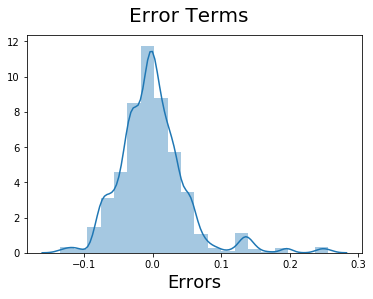

In [61]:
#plotting histogram of error terms
figure=plt.figure()

sns.distplot((Y_train - Y_train_price), bins = 20)
figure.suptitle('Error Terms', fontsize = 20)   
plt.xlabel('Errors', fontsize = 18)    

From the above plot we can find that the error terms are normally distributed.

## Checkpoint6: Making Predictions Using the Final Model

#### Apply Scaling on Test data set

In [62]:
#Scale all the numeric variables
numeric_vars=['wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price','avgmpg']


df_test[numeric_vars]=scaler.fit_transform(df_test[numeric_vars])

df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
2162,1,1,1,0.344023,0.523881,0.441667,0.350000,0.412335,0.320755,0.771429,...,0,0,0,1,0,0,0,0,0,1
1417,1,0,1,0.364431,0.679104,0.516667,0.691667,0.527153,0.226415,0.714286,...,0,0,0,1,0,0,0,0,0,0
880,1,1,1,0.230321,0.361194,0.291667,0.558333,0.155547,0.135849,0.435714,...,0,0,0,1,0,0,0,0,0,0
627,0,1,1,0.533528,0.505970,0.483333,0.550000,0.470132,0.275472,0.635714,...,0,0,0,1,0,0,0,0,0,0
124,1,1,1,0.052478,0.000000,0.000000,0.450000,0.000000,0.000000,0.264286,...,0,0,0,0,0,1,0,0,0,1


In [63]:
df_test.describe()

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_price_range_high,car_price_range_low
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,...,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.913415,0.858537,0.996341,0.346469,0.477459,0.443506,0.502459,0.388908,0.230322,0.554329,...,0.052439,0.017073,0.034146,0.835366,0.098780,0.001220,0.002439,0.017073,0.060976,0.575610
std,0.281398,0.348712,0.060412,0.157176,0.164172,0.158573,0.189021,0.182002,0.132905,0.175216,...,0.223047,0.129623,0.181716,0.371076,0.298549,0.034922,0.049356,0.129623,0.239432,0.494552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.230321,0.376119,0.308333,0.391667,0.245927,0.135849,0.435714,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.288630,0.476119,0.425000,0.516667,0.347944,0.184906,0.521429,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.460641,0.547761,0.516667,0.608333,0.527153,0.301887,0.742857,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [64]:
Y_test = df_test.pop('price')
X_test = df_test

In [65]:
X_train_8_1=X_train_8.drop('const',1,)
X_test_new=X_test[X_train_8_1.columns]

In [66]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

#Making predictions
Y_pred = lr_8.predict(X_test_new)


## Checkpoint7: Model Evaluation 

### R-Squard Evaluation via performing test 

In [67]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9024574723076084

#### Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'Y_pred')

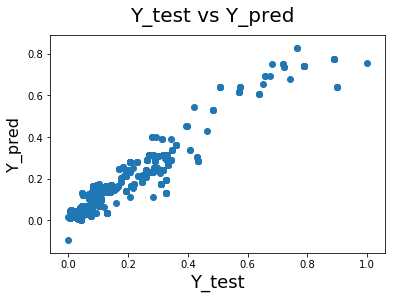

In [68]:
figure = plt.figure()
plt.scatter(Y_test, Y_pred)
figure.suptitle('Y_test vs Y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('Y_pred', fontsize = 16)    

The best fitted line is:
<b><i>price=-0.212 X enginelocation + 0.379 X carwidth + 0.302 X horsepower - 0.024 X carbody_hardtop - 0.016 X carbody_hatchback - 0.233 X enginetype_dohcv + 0.272 X car_price_range_high + 0.052 X carlength - 0.028 X cylindernumber_four
    </i></b>